In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\rezav\OneDrive\Stalinis kompiuteris\Duomenų mokslas\JupyterNotebooksR


In [2]:
df = pd.DataFrame() # naujos data frame sukurimas
df['a'] = np.random.randint(10,50,10) 
df.to_csv('demoDF.csv', sep=';')

In [7]:
#Surinkite visus kauno dienos straipsnių pavadinimus į pandas dataframe.
#eksportuokite tai į CSV failą
#eksportuotą CSV failą nuskaitykite su pandas

sarasas = pd.read_csv('20240419_darbai.csv', sep=';')
sarasas.head()


,Unnamed: 0,Pavadinimas
0,0,Landynė daugiabutyje: ar gali būti blogiau?
1,1,Smarkios avarijos Ramučiuose liudininkai: kalt...
2,2,Už šūkį „šlovė Ukrainai“ – išpuoliai prieš lie...
3,3,Kauno centre – girto vairuotojo šou: nukentėjo...
4,4,„Vičiūnų grupė“ pardavė gamyklą Kaliningrade


In [21]:
#pridėkite naują stulpelį, kuriame būtų žodžių kiekis kiekviename pavadinime
sarasas['zodziuKiekis'] = sarasas['Pavadinimas'].str.split().str.len()
sarasas.head()

,Unnamed: 0,Pavadinimas,zodziuKiekis
0,0,Landynė daugiabutyje: ar gali būti blogiau?,6
1,1,Smarkios avarijos Ramučiuose liudininkai: kalt...,8
2,2,Už šūkį „šlovė Ukrainai“ – išpuoliai prieš lie...,10
3,3,Kauno centre – girto vairuotojo šou: nukentėjo...,8
4,4,„Vičiūnų grupė“ pardavė gamyklą Kaliningrade,5


In [22]:

#pridėkite naują stulpelį, kuriame būtų pavadinime esančių simbolių kiekis
sarasas['simboliuKiekis'] = sarasas['Pavadinimas'].str.len()
sarasas.head()

,Unnamed: 0,Pavadinimas,zodziuKiekis,simboliuKiekis
0,0,Landynė daugiabutyje: ar gali būti blogiau?,6,43
1,1,Smarkios avarijos Ramučiuose liudininkai: kalt...,8,85
2,2,Už šūkį „šlovė Ukrainai“ – išpuoliai prieš lie...,10,73
3,3,Kauno centre – girto vairuotojo šou: nukentėjo...,8,55
4,4,„Vičiūnų grupė“ pardavė gamyklą Kaliningrade,5,46


In [23]:
#Koks vidutinis žodžių kiekis pavadinimuose? 
vidZod = sarasas['zodziuKiekis'].mean()
print(vidZod)

9.211382113821138


<Axes: xlabel='zodziuKiekis', ylabel='Pavadinimas'>

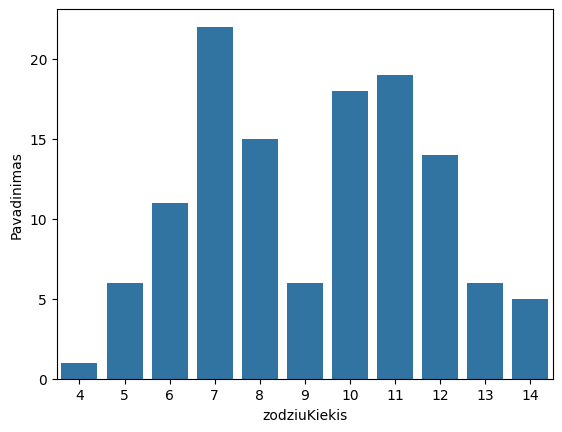

In [28]:
#Po kiek pavadinimų turėjo vienodą žodžių kiekį? Atsakymui pateikite vizualizaciją (grafiką)

ZK = sarasas.groupby('zodziuKiekis').count().reset_index()[['zodziuKiekis','Pavadinimas']]

sns.barplot(data=ZK, x='zodziuKiekis', y='Pavadinimas')


In [36]:
#Advanced: suraskite dažniausiai pasikartojantį žodį pavadinimuose.

VisuZodziuSarasas = []
for e in sarasas['Pavadinimas'].str.split():
    VisuZodziuSarasas.extend(e)
print(VisuZodziuSarasas)

VisiZodziai = pd.DataFrame() # naujos data frame sukurimas

VisiZodziai['zodziai'] = VisuZodziuSarasas

VisiZodziai['zodziai'].value_counts().sort_values(ascending=False).reset_index()

# df.to_csv('demoDF.csv', sep=';')

# dfSarasas = pd.DataFrame()

# dfSarasas['Pavadinimas'] = sarasas

['Landynė', 'daugiabutyje:', 'ar', 'gali', 'būti', 'blogiau?', 'Smarkios', 'avarijos', 'Ramučiuose', 'liudininkai:', 'kalti', 'neveikiantys', 'šviesoforai!', '(papildyta)', 'Už', 'šūkį', '„šlovė', 'Ukrainai“', '–', 'išpuoliai', 'prieš', 'lietuvius', 'užsienio', 'kurortuose', 'Kauno', 'centre', '–', 'girto', 'vairuotojo', 'šou:', 'nukentėjo', 'keleivis', '„Vičiūnų', 'grupė“', 'pardavė', 'gamyklą', 'Kaliningrade', 'Orai:', 'kai', 'kur', 'Lietuvoje', 'iš', 'dangaus', 'krito', 'snaigės', 'Mugė', 'Laisvės', 'alėjoje', '–', 'dar', 'gausesnė', 'Lietingą', 'rytą', 'Kaune', 'lydėjo', 'avarijos', 'Žada,', 'kad', 'iki', '2050-ųjų', 'žuvusiųjų', 'avarijose', 'nebebus:', 'kliedesiai', 'ar', 'realybė?', '„Vičiūnų', 'grupė“', 'pardavė', 'gamyklą', 'Kaliningrade', 'Landynė', 'daugiabutyje:', 'ar', 'gali', 'būti', 'blogiau?', 'Mugė', 'Laisvės', 'alėjoje', '–', 'dar', 'gausesnė', 'VRK:', 'dovanodamas', 'gėles', 'moterims', 'Kaziuko', 'mugėje', 'I.', 'Vėgėlė', 'papirkinėjo', 'rinkėjus', 'Sužydėjusios', '

,zodziai,count
0,–,33
1,ir,17
2,į,9
3,su,7
4,„Kauno,7
...,...,...
800,kodėl,1
801,gauna,1
802,viešose,1
803,Atšilus,1


In [ ]:
#kas atliko šią užduotį: turit likus į kiekvieną straipsnį konkrečiai. Surinkite tokią statistiką - kiek žodžių turi straipsniai? 
# Koks vidutinis žodžių kiekis? Kiek yra straipsnių, kurių žodžių kiekis yra mažesnis, didesnis už vidurkį? Kokia žodžių kiekio mediana?
https://stackoverflow.com/questions/69216352/how-to-extract-text-from-specific-spans-using-beautifulsoup

In [ ]:
sarasas = pd.read_csv('20240419_darbai.csv', sep=';')
sarasas.head()
sarasas['zodziuKiekis'] = sarasas['Pavadinimas'].str.split().str.len()
sarasas.head()
sarasas['simboliuKiekis'] = sarasas['Pavadinimas'].str.len()
sarasas.head()
vidZod = sarasas['zodziuKiekis'].mean()
print(vidZod)
ZK = sarasas.groupby('zodziuKiekis').count().reset_index()[['zodziuKiekis','Pavadinimas']]
sns.barplot(data=ZK, x='zodziuKiekis', y='Pavadinimas')

In [ ]:
#kas atliko šią užduotį: turit likus į kiekvieną straipsnį konkrečiai. 
# Surinkite tokią statistiką - kiek žodžių turi straipsniai? 
# Koks vidutinis žodžių kiekis? 
# Kiek yra straipsnių, kurių žodžių kiekis yra mažesnis, didesnis už vidurkį? 
# Kokia žodžių kiekio mediana?

In [9]:
#surinkite iš puslapių nuo 2 iki 11-to butų skelbimus ir tokią informaciją - kaina, kaina už 1 kv metrą, adresas, plotas, 
# kambarių kiekis. 
# šiuos duomenis eksportuokite į csv failą, skirtukas turi būti ;.
#suraskite, kiek iš atrinktų butų buvo pagal kainą pigūs, brangūs, neįperkami. Kriterijus - 1 kv metro kaina iki 1 VDu - pigūs, iki 3 VDU - brangūs, daugiau nei 3 VDU - neįperkami.
#pavaizduokite su boxplotais kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus.
#Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.
#pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?

sarasas = pd.read_csv('20240422VisiSkelbimai.csv', sep=';')
sarasas.head(5)

,Unnamed: 0,Adresas,Kaina,Kaina_už_m²,Plotas,Kambarių_skaičius


In [26]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\rezav\OneDrive\Stalinis kompiuteris\Duomenų mokslas\JupyterNotebooksR


In [30]:
#surinkite iš puslapių nuo 2 iki 11-to butų skelbimus ir tokią informaciją - kaina, kaina už 1 kv metrą, adresas, plotas, 
# kambarių kiekis. 
# šiuos duomenis eksportuokite į csv failą, skirtukas turi būti ;.

visiButai = pd.read_csv('20240423AruodasVisiSkelbimai.csv', sep=';')
visiButai.head()

,Unnamed: 0,Adresas,Kaina,Kaina_uz_m2,Plotas,Kambariu_skaicius
0,0,"Palanga, A. Mickevičiaus g.",268000,7657,35,2
1,1,"Palanga, A. Mickevičiaus g.",329900,7331,45,3
2,2,"Palanga, S. Daukanto g.",435000,5959,73,4
3,3,"Palanga, S. Daukanto g.",312000,6933,45,3
4,4,"Palanga, Palanga, Saulėlydžio g.",179000,2183,82,3


In [50]:
#suraskite, kiek iš atrinktų butų buvo pagal kainą pigūs, brangūs, neįperkami. 
# Kriterijus - 1 kv metro kaina iki 1 VDu - pigūs, iki 3 VDU - brangūs, daugiau nei 3 VDU - neįperkami.

def kainosKategorija(Kaina_uz_m2):
    vdu = 1902
    if Kaina_uz_m2 < vdu:
        return 'pigus'
    elif Kaina_uz_m2 < 3*vdu:
        return 'brangus'
    else:
        return 'neiperkamas'

visiButai['Kainu_kategorijos'] = visiButai['Kaina_uz_m2'].apply(kainosKategorija)
visiButai.head(5)


,Unnamed: 0,Adresas,Kaina,Kaina_uz_m2,Plotas,Kambariu_skaicius,Kainu_kategorijos
0,0,"Palanga, A. Mickevičiaus g.",268000,7657,35,2,neiperkamas
1,1,"Palanga, A. Mickevičiaus g.",329900,7331,45,3,neiperkamas
2,2,"Palanga, S. Daukanto g.",435000,5959,73,4,neiperkamas
3,3,"Palanga, S. Daukanto g.",312000,6933,45,3,neiperkamas
4,4,"Palanga, Palanga, Saulėlydžio g.",179000,2183,82,3,brangus


In [51]:
GrKainu_kategorijos = visiButai.groupby('Kainu_kategorijos')['Kainu_kategorijos'].value_counts()
GrKainu_kategorijos


Kainu_kategorijos
brangus        70
neiperkamas    13
pigus           8
Name: count, dtype: int64

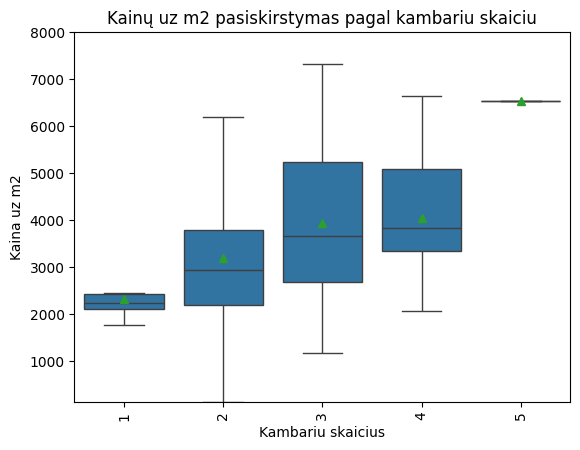

In [49]:
#pavaizduokite su boxplotais kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus.

sns.boxplot(data=visiButai.sort_values(by='Kambariu_skaicius'), x='Kambariu_skaicius', y='Kaina_uz_m2', showmeans=True, showfliers=False)

plt.xticks(rotation=90)
plt.ylim(visiButai['Kaina_uz_m2'].min(), 8000)
plt.xlabel('Kambariu skaicius')
plt.ylabel('Kaina uz m2')
plt.title('Kainu uz m2 pasiskirstymas pagal kambariu skaiciu')
# Atvaizduojame grafiką
plt.show()

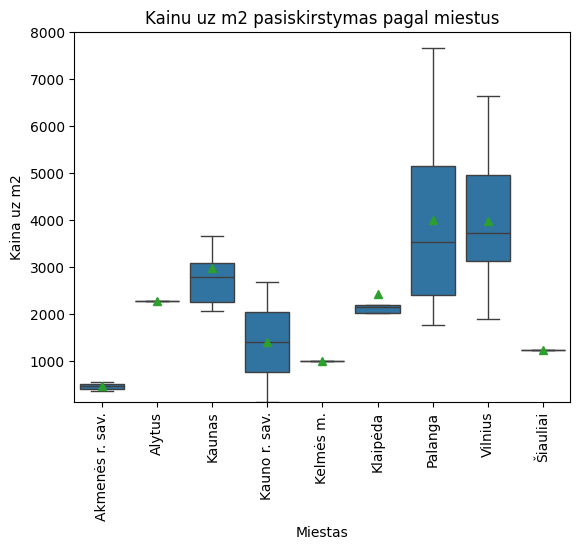

In [54]:
#Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.

def miestoAtrinkimas(adresas):
    return adresas.split(', ')[0]

visiButai['Miestas'] = visiButai['Adresas'].apply(miestoAtrinkimas)

sns.boxplot(data=visiButai.sort_values(by='Miestas'), x='Miestas', y='Kaina_uz_m2', showmeans=True, showfliers=False)

plt.xticks(rotation=90)
plt.ylim(visiButai['Kaina_uz_m2'].min(), 8000)
plt.xlabel('Miestas')
plt.ylabel('Kaina uz m2')
plt.title('Kainu uz m2 pasiskirstymas pagal miestus')
# Atvaizduojame grafiką
plt.show()


In [61]:
#pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?

GrMiestas = visiButai.groupby('Miestas')['Miestas'].value_counts().sort_values(ascending=False)
GrMiestas

Miestas
Vilnius            48
Palanga            16
Kaunas             11
Klaipėda            9
Akmenės r. sav.     2
Kauno r. sav.       2
Alytus              1
Kelmės m.           1
Šiauliai            1
Name: count, dtype: int64

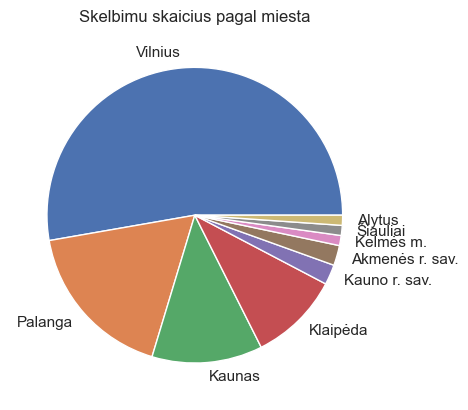

In [77]:
plt.figure()
plt.pie(GrMiestas.values, labels=GrMiestas.index)
plt.title('Skelbimu skaicius pagal miesta')
plt.show()